## 1. The big picture

### The two top sections I don't need to use them

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")    
    urllib.request.urlretrieve(housing_url, tgz_path)    
    housing_tgz = tarfile.open(tgz_path)   
    housing_tgz.extractall(path=housing_path)    
    housing_tgz.close()

import pandas as pd

#### In a real project you would save this code in a Python file, but for now you can just write it in your Jupyternotebook

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 2. Importing the data

In [1]:
import pandas as pd
# Taking a quick look at the data structure
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.1 Taking a quick look at the data

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# ok I only do it this with ocean_proximity because it text data for categorical values of closeness to ocean
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
# this will give a description of the data set
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


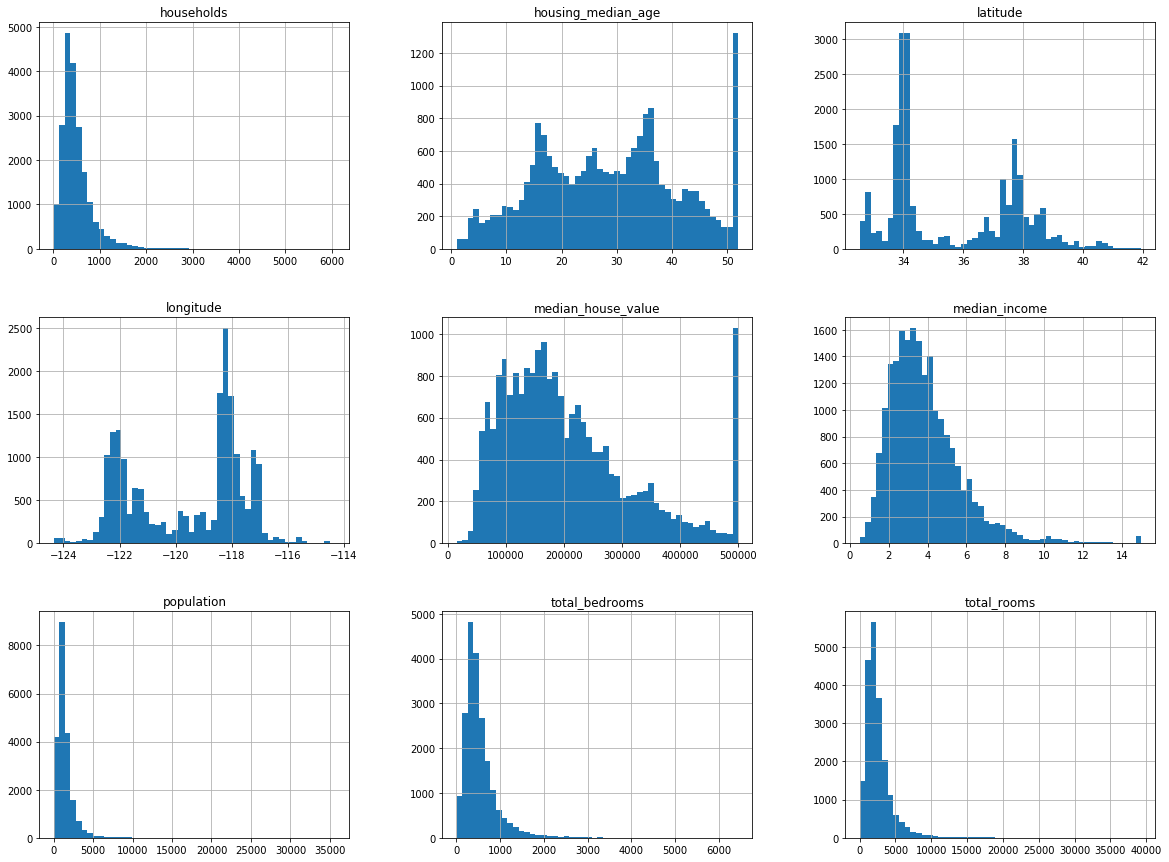

In [5]:
# what is "inline" supposed to do?
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 2.2 Creating a Test set

In [6]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

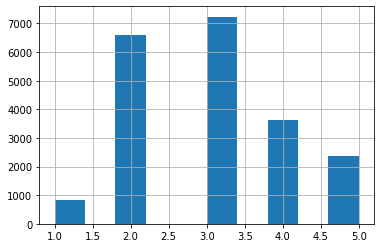

In [9]:
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

In [11]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
# dropping 'income_cat' to return dataframe to original size
for set in (strat_test_set, strat_train_set):
    set.drop(['income_cat'], axis =1, inplace=True)

## 3. Exploring the Data

In [13]:
# creating a copy to avoid harming the training set
housing = strat_train_set.copy()

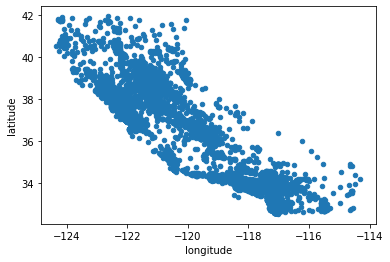

In [14]:
# scatter plot of all districts
housing.plot(kind = 'scatter', x ='longitude', y = 'latitude')

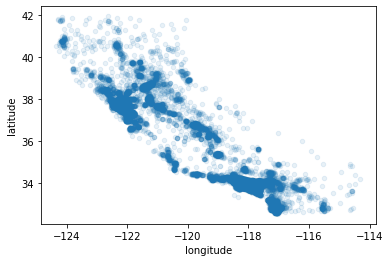

In [15]:
# hard to see patterns, easier to see density to see by reducing the alpha
housing.plot(kind = 'scatter', x ='longitude', y = 'latitude', alpha =0.1)

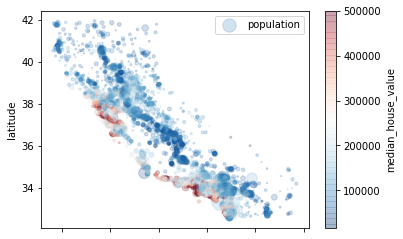

In [16]:
# visualizing housing prices
housing.plot(kind = 'scatter', x ='longitude', y = 'latitude', alpha =0.2,
            s=housing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('RdBu_r'), colorbar=True)
plt.legend()

### 3.1 Looking for correlations 

In [17]:
# computing the standard correlation coefficient AKA "Pearson's r"
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Check this latter, can not get it to run
### Using pandas scatter_matrix function
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_values", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

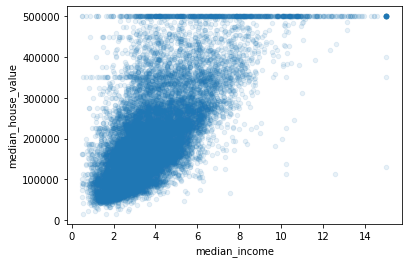

In [32]:
# plotting the most significant graph
# notice the straight lines, corresponding to certain districts,
# Besides de 500,000, unexpectedly there are other straight lines too
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### 3.2 Experimenting with attribute combinations 

In [37]:
# creating interesting attribute combinations, like bedrooms_per_room
# use housing.columns to check the column names
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [39]:
# now we check the correlation matrix again with the new created attributes
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4. Preparing the Data
### 4.1 Cleaning the Data

In [41]:
# reverting to a clean trainning set
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### missing values are a problem
#### Option 1: get rid of the corresponding districts
housing.dropna(subset=['total_bedrooms'])
#### Option 2: get rid of the whole attribute
housing.drop('total_bedrooms', axis=1)
#### Option 3: set the values to something else
median= housing['total_bedrooms'].median()

housing['total_bedrooms'].fillna(median)

* If 3: store the median value from the trainning set, it is needed later for the test set


In [44]:
# using scikitlearn imputer
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median') 
# imputer only works on numerical values, we need to transfrom the ocean_proximity to a number
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

C:\Users\joera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [45]:
#median of each attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
# using the 'trained' imputer to transform the training set
X = imputer.transform(housing_num)
# turning it back into a data frame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### 4.2 Handling text and categorical data

In [54]:
# most ML models prefer working with number than text
# we are using scikit learn transformer for this task
#from sklearn.preprocessing import LabelEnconder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

59 -> 63